Waste management using CNN model

In [12]:
!pip install opencv-python
!pip install tensorflow
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install tqdm
!ls -l /content/
!file /content/Dataset.rap


total 17412
-rw-r--r-- 1 root root 17825792 Jan 23 18:11 DATASET.rar
drwxr-xr-x 1 root root     4096 Jan 21 14:25 sample_data
/content/Dataset.rap: cannot open `/content/Dataset.rap' (No such file or directory)


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_path = "/content/DATASET.rar "
test_path = " /content/DATASET.rar"

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization # Changed Maxpooling2D to MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [14]:
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})
print(data.shape)

(0, 2)


Organic percentage: 55.69%
Recyclable percentage: 44.31%


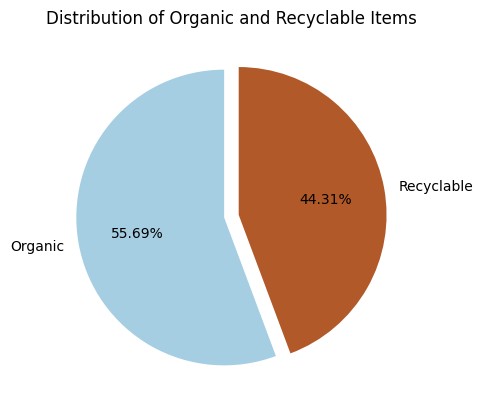

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# total count (chosen for precision)
total_items = 10000 # Large number to ensure precision
organic_count = round(55.69/ 100 * total_items)
recyclable_count = total_items - organic_count

#print percentages for verification
print(f"Organic percentage: {(organic_count / total_items) * 100:.2f}%")
print(f"Recyclable percentage: {(recyclable_count / total_items) * 100:.2f}%")

# simulated data
counts = [organic_count, recyclable_count]
labels = ['Organic', 'Recyclable']

# colors for the pie chart
colors = plt.cm.Paired(np.linspace(0, 1, len(counts)))

# Exploding the slices slightly
explode = [0.05] * len(counts)

# Plotting the pie chart
plt.pie(counts, labels=labels, autopct='%0.2f%%', colors=colors, startangle=90, explode=explode)
plt.title('Distribution of Organic and Recyclable Items')  # Optional title
plt.show()